### Pivot Tables
* What is a pivot table

In [3]:
%%HTML
<video width="320" height="240" controls>
  <source src="pivot_table.mp4" type="video/mp4">
</video>

In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Motivating Pivot Tables

In [ ]:
titanic = sns.load_dataset('titanic')

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic.shape

(891, 15)

### Pivot Tables by Hand

In [17]:
# survival rate by gender
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [22]:
# group by class and gender
# select suvival
# apply a mean aggregate
# combine the resulting gropus
# unstack the hierarchical index
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

# The 2D GroupBy is common enough that Pandas includes a convenience routine,
# pivot_table, which succinctly handles this type of multi-D aggregation.

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


* The 2D GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multi-D aggregation.

* **Signature**: titanic.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
* **Docstring**:
    * Create a spreadsheet-style pivot table as a DataFrame. 
    * The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame

* **Parameters**
    * values : column to aggregate, optional 
    * index : column, Grouper, array, or list of the previous
        * If an array is passed, it must be the same length as the data. 
        * The list can contain any of the other types (except list).
        * Keys to group by on the pivot table index.  
        * If an array is passed, it is being used as the same manner as column values.
    * columns : column, Grouper, array, or list of the previous
        * If an array is passed, it must be the same length as the data. 
        * The list can contain any of the other types (except list).
        * Keys to group by on the pivot table column.  
        * If an array is passed, it is being used as the same manner as column values.
    * aggfunc : function or list of functions, default numpy.mean
        * If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves)
    * fill_value : scalar, default None
        * Value to replace missing values with
    * margins : boolean, default False
        * Add all row / columns (e.g. for subtotal / grand totals)
    * dropna : boolean, default True
        * Do not include columns whose entries are all NaN
    * margins_name : string, default 'All'
        Name of the row / column that will contain the totals when margins is True.

In [23]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [42]:
titanic.pivot_table(['survived'], index = ['sex'], aggfunc = ('mean', 'median'), columns = 'class').stack()

survived       
                   mean median
sex    class                  
female First   0.968085    1.0
       Second  0.921053    1.0
       Third   0.500000    0.5
male   First   0.368852    0.0
       Second  0.157407    0.0
       Third   0.135447    0.0

### Multilevel pivot tables


In [44]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [47]:
fare = pd.qcut(titanic['fare'], 4)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 7.91]           (7.91, 14.454]            \
class                    First     Third         Second     Third   
sex    age                                                          
female (0, 18]             NaN  0.625000       1.000000  0.769231   
       (18, 80]            NaN  0.600000       0.880000  0.333333   
male   (0, 18]             NaN  0.000000       0.000000  0.461538   
       (18, 80]            0.0  0.103774       0.098039  0.157143   

fare            (14.454, 31.0]                     (31.0, 512.329]         \
class                    First    Second     Third           First Second   
sex    age                                                                  
female (0, 18]             NaN  1.000000  0.400000        0.909091   1.00   
       (18, 80]          0.875  0.900000  0.470588        0.984848   1.00   
male   (0, 18]             NaN  0.857143  0.266667        0.800000   0.75   
       (18, 80]          0.500  0.041667  0.095238        0.333333   0.00   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.142857  
       (18, 80]  0.166667  
male   (0, 18]   0.076923  
       (18, 80]  0.600000

#### Additional pivot table optoins
* titanic.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    * **aggfunc**
        * 'mean' by default
        * 'sum', 'mean', 'count', 'min', 'max', etc
        * np.sum(), min(), sum(), etc
        * dictionary mapping a column to any of the above desired options
    * **margins**
        * compute totals along each grouping

In [49]:
titanic.pivot_table(index = 'sex', columns = 'class', 
                   aggfunc = {'survived':np.mean, 'fare':'mean'})

fare                        survived                    
class        First     Second      Third     First    Second     Third
sex                                                                   
female  106.125798  21.970121  16.118810  0.968085  0.921053  0.500000
male     67.226127  19.741782  12.661633  0.368852  0.157407  0.135447

In [51]:
titanic.pivot_table('survived', index = 'sex', columns = 'class',
                    margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [59]:
!curl -0 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

year,month,day,gender,births
1969,1,1,F,4046
1969,1,1,M,4440
1969,1,2,F,4454
1969,1,2,M,4548
1969,1,3,F,4548
1969,1,3,M,4994
1969,1,4,F,4440
1969,1,4,M,4520
1969,1,5,F,4192
1969,1,5,M,4198
1969,1,6,F,4710
1969,1,6,M,4850
1969,1,7,F,4646
1969,1,7,M,5092
1969,1,8,F,4800
1969,1,8,M,4934
1969,1,9,F,4592
1969,1,9,M,4842
1969,1,10,F,4852
1969,1,10,M,5190
1969,1,11,F,4580
1969,1,11,M,4598
1969,1,12,F,4126
1969,1,12,M,4324
1969,1,13,F,4758
1969,1,13,M,5076
1969,1,14,F,5070
1969,1,14,M,5296
1969,1,15,F,4798
1969,1,15,M,5096
1969,1,16,F,4790
1969,1,16,M,4872
1969,1,17,F,4944
1969,1,17,M,5030
1969,1,18,F,4670
1969,1,18,M,4642
1969,1,19,F,4170
1969,1,19,M,4452
1969,1,20,F,4884
1969,1,20,M,4924
1969,1,21,F,5042
1969,1,21,M,5432
1969,1,22,F,4796
1969,1,22,M,5088
1969,1,23,F,4794
1969,1,23,M,4660
1969,1,24,F,4752
1969,1,24,M,5046
1969,1,25,F,4348
1969,1,25,M,4674
1969,1,26,F,4230
1969,1,26,M,4338
1969,1,27,F,4864
1969,1,27,M,5046
1969,1,28,F,4860
1969,1,28,M,5172
1969,1,29,F,4500
1969,1,29,M,4880
196

1971,3,17,M,5264
1971,3,18,F,4780
1971,3,18,M,5018
1971,3,19,F,5082
1971,3,19,M,5394
1971,3,20,F,4554
1971,3,20,M,4610
1971,3,21,F,4222
1971,3,21,M,4466
1971,3,22,F,4812
1971,3,22,M,5330
1971,3,23,F,5030
1971,3,23,M,5310
1971,3,24,F,4844
1971,3,24,M,4964
1971,3,25,F,4894
1971,3,25,M,5060
1971,3,26,F,4772
1971,3,26,M,5098
1971,3,27,F,4282
1971,3,27,M,4514
1971,3,28,F,4228
1971,3,28,M,4444
1971,3,29,F,4918
1971,3,29,M,5302
1971,3,30,F,5160
1971,3,30,M,5256
1971,3,31,F,4966
1971,3,31,M,5258
1971,3,99,F,10
1971,3,99,M,8
1971,4,1,F,4818
1971,4,1,M,4938
1971,4,2,F,5020
1971,4,2,M,5246
1971,4,3,F,4256
1971,4,3,M,4620
1971,4,4,F,4090
1971,4,4,M,4244
1971,4,5,F,4940
1971,4,5,M,5042
1971,4,6,F,5054
1971,4,6,M,5388
1971,4,7,F,4790
1971,4,7,M,4956
1971,4,8,F,4822
1971,4,8,M,4940
1971,4,9,F,4702
1971,4,9,M,5054
1971,4,10,F,4116
1971,4,10,M,4546
1971,4,11,F,3900
1971,4,11,M,4190
1971,4,12,F,4650
1971,4,12,M,5056
1971,4,13,F,4930
1971,4,13,M,5366
1971,4,14,F,4814
1971,4,14,M,5130
1971,4,15,F,4666
197

1972,7,7,F,4623
1972,7,7,M,4887
1972,7,8,F,4287
1972,7,8,M,4335
1972,7,9,F,3714
1972,7,9,M,3942
1972,7,10,F,4449
1972,7,10,M,4813
1972,7,11,F,4714
1972,7,11,M,4921
1972,7,12,F,4779
1972,7,12,M,4959
1972,7,13,F,4537
1972,7,13,M,4853
1972,7,14,F,4697
1972,7,14,M,4960
1972,7,15,F,4303
1972,7,15,M,4443
1972,7,16,F,3865
1972,7,16,M,4103
1972,7,17,F,4702
1972,7,17,M,4832
1972,7,18,F,4709
1972,7,18,M,5010
1972,7,19,F,4478
1972,7,19,M,4757
1972,7,20,F,4642
1972,7,20,M,4906
1972,7,21,F,4794
1972,7,21,M,4870
1972,7,22,F,4191
1972,7,22,M,4404
1972,7,23,F,3902
1972,7,23,M,4052
1972,7,24,F,4592
1972,7,24,M,4893
1972,7,25,F,4611
1972,7,25,M,5051
1972,7,26,F,4453
1972,7,26,M,4693
1972,7,27,F,4747
1972,7,27,M,4746
1972,7,28,F,4672
1972,7,28,M,4834
1972,7,29,F,4088
1972,7,29,M,4353
1972,7,30,F,3743
1972,7,30,M,3967
1972,7,31,F,4316
1972,7,31,M,4824
1972,7,99,F,6
1972,7,99,M,10
1972,8,1,F,4814
1972,8,1,M,5022
1972,8,2,F,4639
1972,8,2,M,4741
1972,8,3,F,4493
1972,8,3,M,4807
1972,8,4,F,4663
1972,8,4,M,4829

1973,10,29,M,4487
1973,10,30,F,4219
1973,10,30,M,4509
1973,10,31,F,4161
1973,10,31,M,4534
1973,10,99,F,24
1973,10,99,M,14
1973,11,1,F,4297
1973,11,1,M,4466
1973,11,2,F,4195
1973,11,2,M,4564
1973,11,3,F,3736
1973,11,3,M,4005
1973,11,4,F,3535
1973,11,4,M,3710
1973,11,5,F,4143
1973,11,5,M,4569
1973,11,6,F,4197
1973,11,6,M,4411
1973,11,7,F,4186
1973,11,7,M,4530
1973,11,8,F,4249
1973,11,8,M,4397
1973,11,9,F,4365
1973,11,9,M,4632
1973,11,10,F,3778
1973,11,10,M,4081
1973,11,11,F,3580
1973,11,11,M,3840
1973,11,12,F,4314
1973,11,12,M,4370
1973,11,13,F,4364
1973,11,13,M,4785
1973,11,14,F,4393
1973,11,14,M,4446
1973,11,15,F,4259
1973,11,15,M,4462
1973,11,16,F,4453
1973,11,16,M,4686
1973,11,17,F,3856
1973,11,17,M,4021
1973,11,18,F,3679
1973,11,18,M,3741
1973,11,19,F,4353
1973,11,19,M,4522
1973,11,20,F,4430
1973,11,20,M,4969
1973,11,21,F,4140
1973,11,21,M,4456
1973,11,22,F,3452
1973,11,22,M,3597
1973,11,23,F,4055
1973,11,23,M,4187
1973,11,24,F,3740
1973,11,24,M,4020
1973,11,25,F,3621
1973,11,25,M,3

1975,2,18,M,4833
1975,2,19,F,4217
1975,2,19,M,4579
1975,2,20,F,4374
1975,2,20,M,4610
1975,2,21,F,4472
1975,2,21,M,4447
1975,2,22,F,3860
1975,2,22,M,4057
1975,2,23,F,3495
1975,2,23,M,3782
1975,2,24,F,4288
1975,2,24,M,4566
1975,2,25,F,4433
1975,2,25,M,4717
1975,2,26,F,4295
1975,2,26,M,4525
1975,2,27,F,4071
1975,2,27,M,4470
1975,2,28,F,4418
1975,2,28,M,4556
1975,2,29,F,3
1975,2,29,M,4
1975,2,31,F,1
1975,2,99,F,6
1975,2,99,M,9
1975,3,1,F,3882
1975,3,1,M,4039
1975,3,2,F,3642
1975,3,2,M,3745
1975,3,3,F,4351
1975,3,3,M,4612
1975,3,4,F,4421
1975,3,4,M,4616
1975,3,5,F,4286
1975,3,5,M,4568
1975,3,6,F,4241
1975,3,6,M,4599
1975,3,7,F,4491
1975,3,7,M,4564
1975,3,8,F,3870
1975,3,8,M,3934
1975,3,9,F,3510
1975,3,9,M,3636
1975,3,10,F,4208
1975,3,10,M,4360
1975,3,11,F,4504
1975,3,11,M,4735
1975,3,12,F,4290
1975,3,12,M,4643
1975,3,13,F,4283
1975,3,13,M,4327
1975,3,14,F,4522
1975,3,14,M,4576
1975,3,15,F,3675
1975,3,15,M,3916
1975,3,16,F,3520
1975,3,16,M,3715
1975,3,17,F,4326
1975,3,17,M,4674
1975,3,18,F,4

1976,6,11,F,4393
1976,6,11,M,4667
1976,6,12,F,3848
1976,6,12,M,4046
1976,6,13,F,3671
1976,6,13,M,3769
1976,6,14,F,4379
1976,6,14,M,4593
1976,6,15,F,4298
1976,6,15,M,4762
1976,6,16,F,4313
1976,6,16,M,4655
1976,6,17,F,4134
1976,6,17,M,4697
1976,6,18,F,4233
1976,6,18,M,4600
1976,6,19,F,3792
1976,6,19,M,4037
1976,6,20,F,3573
1976,6,20,M,3824
1976,6,21,F,4105
1976,6,21,M,4359
1976,6,22,F,4428
1976,6,22,M,4620
1976,6,23,F,4393
1976,6,23,M,4510
1976,6,24,F,4463
1976,6,24,M,4554
1976,6,25,F,4420
1976,6,25,M,4706
1976,6,26,F,3778
1976,6,26,M,4049
1976,6,27,F,3736
1976,6,27,M,3878
1976,6,28,F,4434
1976,6,28,M,4637
1976,6,29,F,4532
1976,6,29,M,4955
1976,6,30,F,4362
1976,6,30,M,4770
1976,6,31,F,2
1976,6,99,F,14
1976,6,99,M,12
1976,7,1,F,4403
1976,7,1,M,4669
1976,7,2,F,4548
1976,7,2,M,4812
1976,7,3,F,3814
1976,7,3,M,4104
1976,7,4,F,3882
1976,7,4,M,4011
1976,7,5,F,3630
1976,7,5,M,3934
1976,7,6,F,4498
1976,7,6,M,4729
1976,7,7,F,4838
1976,7,7,M,5109
1976,7,8,F,4651
1976,7,8,M,4898
1976,7,9,F,4707
1976

1977,10,3,M,5088
1977,10,4,F,4926
1977,10,4,M,5250
1977,10,5,F,4847
1977,10,5,M,4957
1977,10,6,F,4762
1977,10,6,M,5064
1977,10,7,F,4836
1977,10,7,M,5136
1977,10,8,F,4122
1977,10,8,M,4438
1977,10,9,F,4077
1977,10,9,M,4243
1977,10,10,F,4797
1977,10,10,M,4849
1977,10,11,F,4798
1977,10,11,M,5131
1977,10,12,F,4769
1977,10,12,M,4874
1977,10,13,F,4693
1977,10,13,M,4899
1977,10,14,F,4712
1977,10,14,M,4913
1977,10,15,F,4146
1977,10,15,M,4242
1977,10,16,F,4048
1977,10,16,M,4195
1977,10,17,F,4679
1977,10,17,M,4825
1977,10,18,F,4651
1977,10,18,M,5027
1977,10,19,F,4764
1977,10,19,M,4886
1977,10,20,F,4600
1977,10,20,M,4986
1977,10,21,F,4761
1977,10,21,M,4920
1977,10,22,F,4051
1977,10,22,M,4225
1977,10,23,F,3761
1977,10,23,M,4062
1977,10,24,F,4558
1977,10,24,M,4674
1977,10,25,F,4754
1977,10,25,M,5031
1977,10,26,F,4676
1977,10,26,M,4891
1977,10,27,F,4677
1977,10,27,M,4754
1977,10,28,F,4535
1977,10,28,M,4862
1977,10,29,F,3936
1977,10,29,M,4247
1977,10,30,F,3872
1977,10,30,M,4207
1977,10,31,F,4366
1977,

1979,9,29,F,4689
1979,9,29,M,4853
1979,9,30,F,4505
1979,9,30,M,4607
1979,9,99,F,14
1979,9,99,M,11
1979,10,1,F,5083
1979,10,1,M,5392
1979,10,2,F,5271
1979,10,2,M,5640
1979,10,3,F,5145
1979,10,3,M,5452
1979,10,4,F,5041
1979,10,4,M,5273
1979,10,5,F,5176
1979,10,5,M,5424
1979,10,6,F,4484
1979,10,6,M,4654
1979,10,7,F,4148
1979,10,7,M,4470
1979,10,8,F,4868
1979,10,8,M,5175
1979,10,9,F,4994
1979,10,9,M,5356
1979,10,10,F,4994
1979,10,10,M,5205
1979,10,11,F,4917
1979,10,11,M,5189
1979,10,12,F,5067
1979,10,12,M,5354
1979,10,13,F,4419
1979,10,13,M,4545
1979,10,14,F,4208
1979,10,14,M,4274
1979,10,15,F,5004
1979,10,15,M,5160
1979,10,16,F,5075
1979,10,16,M,5181
1979,10,17,F,4843
1979,10,17,M,5164
1979,10,18,F,4791
1979,10,18,M,4983
1979,10,19,F,4967
1979,10,19,M,5266
1979,10,20,F,4298
1979,10,20,M,4393
1979,10,21,F,4270
1979,10,21,M,4384
1979,10,22,F,4805
1979,10,22,M,5441
1979,10,23,F,4921
1979,10,23,M,5276
1979,10,24,F,4861
1979,10,24,M,5123
1979,10,25,F,4714
1979,10,25,M,5192
1979,10,26,F,4860
19

1981,10,1,M,5618
1981,10,2,F,5298
1981,10,2,M,5720
1981,10,3,F,4529
1981,10,3,M,4789
1981,10,4,F,4314
1981,10,4,M,4591
1981,10,5,F,5459
1981,10,5,M,5415
1981,10,6,F,5409
1981,10,6,M,5490
1981,10,7,F,5150
1981,10,7,M,5333
1981,10,8,F,5130
1981,10,8,M,5275
1981,10,9,F,5253
1981,10,9,M,5652
1981,10,10,F,4582
1981,10,10,M,4731
1981,10,11,F,4215
1981,10,11,M,4541
1981,10,12,F,5025
1981,10,12,M,5347
1981,10,13,F,5130
1981,10,13,M,5486
1981,10,14,F,4948
1981,10,14,M,5266
1981,10,15,F,5177
1981,10,15,M,5279
1981,10,16,F,5187
1981,10,16,M,5529
1981,10,17,F,4140
1981,10,17,M,4397
1981,10,18,F,4058
1981,10,18,M,4482
1981,10,19,F,4813
1981,10,19,M,5210
1981,10,20,F,5045
1981,10,20,M,5232
1981,10,21,F,5167
1981,10,21,M,5293
1981,10,22,F,5016
1981,10,22,M,5251
1981,10,23,F,5059
1981,10,23,M,5257
1981,10,24,F,4257
1981,10,24,M,4430
1981,10,25,F,4276
1981,10,25,M,4457
1981,10,26,F,5007
1981,10,26,M,5037
1981,10,27,F,5048
1981,10,27,M,5404
1981,10,28,F,4901
1981,10,28,M,5252
1981,10,29,F,4974
1981,10,2

1983,10,2,F,4319
1983,10,2,M,4574
1983,10,3,F,5267
1983,10,3,M,5539
1983,10,4,F,5476
1983,10,4,M,5706
1983,10,5,F,5306
1983,10,5,M,5456
1983,10,6,F,5293
1983,10,6,M,5382
1983,10,7,F,5253
1983,10,7,M,5500
1983,10,8,F,4355
1983,10,8,M,4616
1983,10,9,F,4208
1983,10,9,M,4343
1983,10,10,F,5051
1983,10,10,M,5222
1983,10,11,F,5141
1983,10,11,M,5515
1983,10,12,F,5247
1983,10,12,M,5398
1983,10,13,F,5005
1983,10,13,M,5315
1983,10,14,F,5223
1983,10,14,M,5387
1983,10,15,F,4105
1983,10,15,M,4465
1983,10,16,F,4199
1983,10,16,M,4306
1983,10,17,F,5047
1983,10,17,M,5255
1983,10,18,F,5071
1983,10,18,M,5414
1983,10,19,F,4952
1983,10,19,M,5272
1983,10,20,F,5132
1983,10,20,M,5260
1983,10,21,F,4914
1983,10,21,M,5278
1983,10,22,F,4154
1983,10,22,M,4472
1983,10,23,F,4005
1983,10,23,M,4229
1983,10,24,F,4953
1983,10,24,M,5272
1983,10,25,F,5212
1983,10,25,M,5412
1983,10,26,F,4950
1983,10,26,M,5251
1983,10,27,F,4974
1983,10,27,M,5286
1983,10,28,F,4978
1983,10,28,M,5328
1983,10,29,F,4123
1983,10,29,M,4381
1983,10,

1985,10,8,M,5843
1985,10,9,F,5270
1985,10,9,M,5689
1985,10,10,F,5405
1985,10,10,M,5652
1985,10,11,F,5448
1985,10,11,M,5736
1985,10,12,F,4334
1985,10,12,M,4614
1985,10,13,F,4258
1985,10,13,M,4257
1985,10,14,F,5198
1985,10,14,M,5453
1985,10,15,F,5497
1985,10,15,M,5856
1985,10,16,F,5286
1985,10,16,M,5498
1985,10,17,F,5237
1985,10,17,M,5572
1985,10,18,F,5197
1985,10,18,M,5652
1985,10,19,F,4323
1985,10,19,M,4524
1985,10,20,F,4082
1985,10,20,M,4399
1985,10,21,F,5292
1985,10,21,M,5481
1985,10,22,F,5332
1985,10,22,M,5691
1985,10,23,F,5241
1985,10,23,M,5457
1985,10,24,F,5222
1985,10,24,M,5435
1985,10,25,F,5299
1985,10,25,M,5593
1985,10,26,F,4274
1985,10,26,M,4447
1985,10,27,F,4338
1985,10,27,M,4485
1985,10,28,F,5066
1985,10,28,M,5444
1985,10,29,F,5201
1985,10,29,M,5589
1985,10,30,F,5208
1985,10,30,M,5458
1985,10,31,F,5050
1985,10,31,M,5196
1985,11,1,F,5431
1985,11,1,M,5664
1985,11,2,F,4422
1985,11,2,M,4453
1985,11,3,F,4159
1985,11,3,M,4283
1985,11,4,F,5360
1985,11,4,M,5536
1985,11,5,F,5404
1985

1987,2,17,F,5323
1987,2,17,M,5607
1987,2,18,F,5279
1987,2,18,M,5477
1987,2,19,F,5139
1987,2,19,M,5349
1987,2,20,F,5480
1987,2,20,M,5512
1987,2,21,F,4275
1987,2,21,M,4565
1987,2,22,F,4268
1987,2,22,M,4374
1987,2,23,F,5267
1987,2,23,M,5485
1987,2,24,F,5396
1987,2,24,M,5619
1987,2,25,F,5253
1987,2,25,M,5610
1987,2,26,F,5117
1987,2,26,M,5508
1987,2,27,F,5416
1987,2,27,M,5594
1987,2,28,F,4331
1987,2,28,M,4614
1987,2,99,M,3
1987,3,1,F,4196
1987,3,1,M,4289
1987,3,2,F,5317
1987,3,2,M,5501
1987,3,3,F,5323
1987,3,3,M,5608
1987,3,4,F,5185
1987,3,4,M,5482
1987,3,5,F,5460
1987,3,5,M,5511
1987,3,6,F,5503
1987,3,6,M,5592
1987,3,7,F,4229
1987,3,7,M,4525
1987,3,8,F,3926
1987,3,8,M,4368
1987,3,9,F,5226
1987,3,9,M,5583
1987,3,10,F,5469
1987,3,10,M,5731
1987,3,11,F,5214
1987,3,11,M,5483
1987,3,12,F,5363
1987,3,12,M,5537
1987,3,13,F,4988
1987,3,13,M,5411
1987,3,14,F,4315
1987,3,14,M,4522
1987,3,15,F,4130
1987,3,15,M,4188
1987,3,16,F,5322
1987,3,16,M,5496
1987,3,17,F,5490
1987,3,17,M,5736
1987,3,18,F,5366
1

1994,1,null,M,163982
1994,2,null,F,147453
1994,2,null,M,154175
1994,3,null,F,165797
1994,3,null,M,174281
1994,4,null,F,154935
1994,4,null,M,162778
1994,5,null,F,160679
1994,5,null,M,169921
1994,6,null,F,160576
1994,6,null,M,169510
1994,7,null,F,168646
1994,7,null,M,177579
1994,8,null,F,172383
1994,8,null,M,180197
1994,9,null,F,166020
1994,9,null,M,173600
1994,10,null,F,162185
1994,10,null,M,168356
1994,11,null,F,156514
1994,11,null,M,163252
1994,12,null,F,160031
1994,12,null,M,167060
1995,1,null,F,154538
1995,1,null,M,161749
1995,2,null,F,144485
1995,2,null,M,150879
1995,3,null,F,160096
1995,3,null,M,168678
1995,4,null,F,150914
1995,4,null,M,158447
1995,5,null,F,162601
1995,5,null,M,172235
1995,6,null,F,160527
1995,6,null,M,169557
1995,7,null,F,166814
1995,7,null,M,174366
1995,8,null,F,171158
1995,8,null,M,179864
1995,9,null,F,165661
1995,9,null,M,173746
1995,10,null,F,162008
1995,10,null,M,168303
1995,11,null,F,151949
1995,11,null,M,159181
1995,12,null,F,154120
1995,12,null,M,161136
1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   501k      0 --:--:-- --:--:-- --:--:--  501k


In [66]:
Out[51]

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [68]:
births = pd.read_csv('births.csv')

In [69]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [72]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

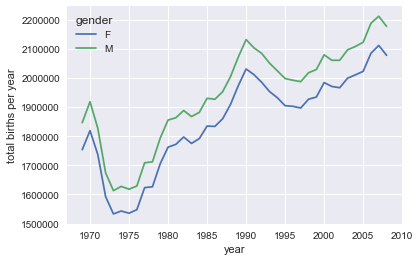

In [76]:
%matplotlib inline
sns.set() # use Seaborn as plt
births.pivot_table('births', index = 'year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

#### Further data exploration

In [82]:
# Cut outliers
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# 0.74: interquartile range of a Gaussian distribution.

In [83]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [84]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [86]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'].astype(int);

In [93]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month +
                              births.day, format="%Y%m%d")

births['dayofweek'] = births.index.dayofweek 

In [95]:
births.head(n= 20)

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4
1969-01-03,1969,1,3.0,M,4994,1960,4
1969-01-04,1969,1,4.0,F,4440,1960,5
1969-01-04,1969,1,4.0,M,4520,1960,5
1969-01-05,1969,1,5.0,F,4192,1960,6
1969-01-05,1969,1,5.0,M,4198,1960,6


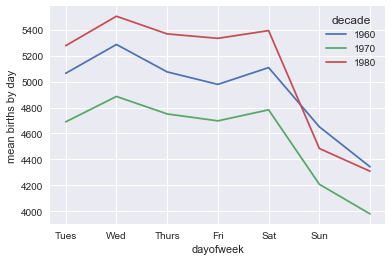

In [99]:
births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [100]:
# Plot the mean # of births by the day of the year
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()
# multi-index over months and days

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [107]:
# To make this easily plottable, 
# let’s turn these months and days into a date by associating them 
# with a dummy year variable
# (making sure to choose a leap year so February 29th is correctly handled!)

births_by_date2 = births_by_date.copy()
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date2.index]
births_by_date.head()

TypeError: 'Timestamp' object is not iterable